## Importing required Libraries and Packages

In [2]:
# Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipaddress
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

##  Load the Dataset

In [4]:
#Load the chosen dataset
df = pd.read_csv("cybersecurity_attacks.csv", parse_dates=['Timestamp'])

## Exploratory Analysis of Dataset

In [6]:
#Display the first 05 records in chosen dataset
df.head().T

,0,1,2,3,4
Timestamp,2023-05-30 06:33:58,2020-08-26 07:08:30,2022-11-13 08:23:25,2023-07-02 10:38:46,2023-07-16 13:11:07
Source IP Address,103.216.15.12,78.199.217.198,63.79.210.48,163.42.196.10,71.166.185.76
Destination IP Address,84.9.164.252,66.191.137.154,198.219.82.17,101.228.192.255,189.243.174.238
Source Port,31225,17245,16811,20018,6131
Destination Port,17616,48166,53600,32534,26646
Protocol,ICMP,ICMP,UDP,UDP,TCP
Packet Length,503,1174,306,385,1462
Packet Type,Data,Data,Control,Data,Data
Traffic Type,HTTP,HTTP,HTTP,HTTP,DNS
Payload Data,Qui natus odio asperiores nam. Optio nobis ius...,Aperiam quos modi officiis veritatis rem. Omni...,Perferendis sapiente vitae soluta. Hic delectu...,Totam maxime beatae expedita explicabo porro l...,Odit nesciunt dolorem nisi iste iusto. Animi v...


In [7]:
#Dimension of the Dataset
print("Dimension (No.of Rows, No.of Columns) of the Dataset: ", df.shape)

Dimension (No.of Rows, No.of Columns) of the Dataset:  (40000, 25)


In [8]:
#Dataset Information: Dimension, Column Names & its count, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Timestamp               40000 non-null  datetime64[ns]
 1   Source IP Address       40000 non-null  object        
 2   Destination IP Address  40000 non-null  object        
 3   Source Port             40000 non-null  int64         
 4   Destination Port        40000 non-null  int64         
 5   Protocol                40000 non-null  object        
 6   Packet Length           40000 non-null  int64         
 7   Packet Type             40000 non-null  object        
 8   Traffic Type            40000 non-null  object        
 9   Payload Data            40000 non-null  object        
 10  Malware Indicators      20000 non-null  object        
 11  Anomaly Scores          40000 non-null  float64       
 12  Alerts/Warnings         19933 non-null  object

In [9]:
#Dataset Description: Statistical summary for numerical columns of the dataset
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,40000,2021-11-22 06:17:52.200800256,2020-01-01 00:43:27,2020-12-12 19:56:28.500000,2021-11-21 18:12:51,2022-10-30 08:48:10.500000,2023-10-11 19:34:23,NaN
Source Port,40000.0,32970.35645,1027.0,16850.75,32856.0,48928.25,65530.0,18560.425604
Destination Port,40000.0,33150.86865,1024.0,17094.75,33004.5,49287.0,65535.0,18574.668842
Packet Length,40000.0,781.452725,64.0,420.0,782.0,1143.0,1500.0,416.044192
Anomaly Scores,40000.0,50.113473,0.0,25.15,50.345,75.03,100.0,28.853598


Information on Frequncy of Attacks


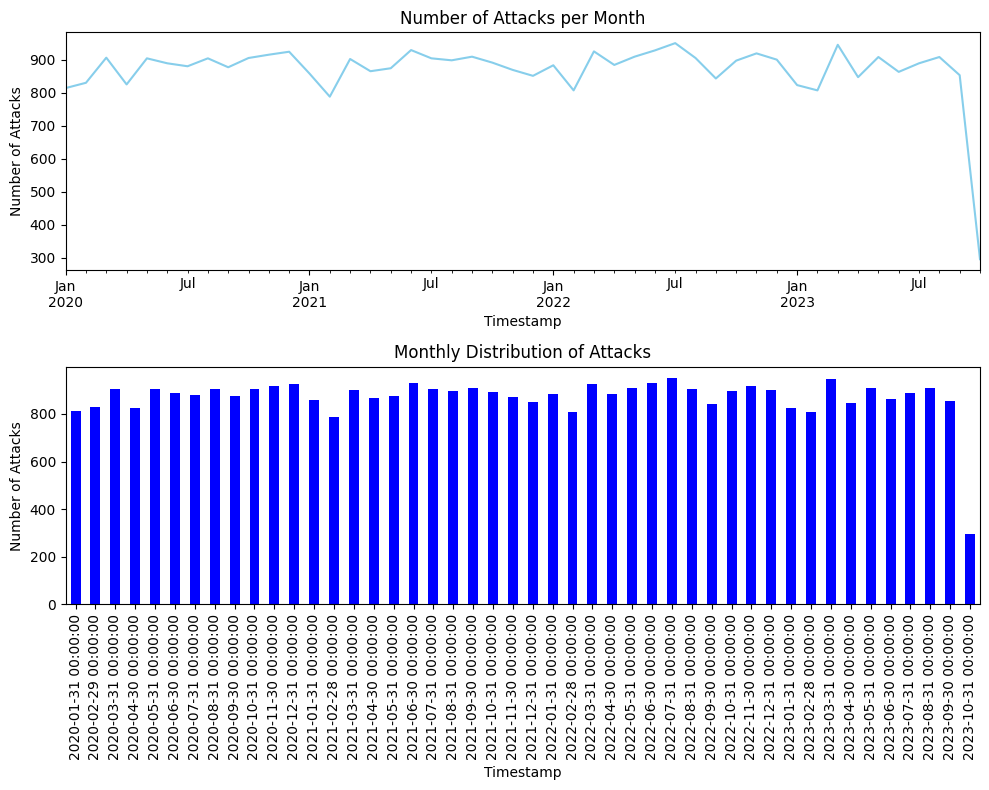

In [10]:
#Frequency of Attacks
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
monthly_attacks = df.resample('ME', on='Timestamp')['Attack Type'].count()

print("Information on Frequncy of Attacks")
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

monthly_attacks.plot(ax=ax[0], color='skyblue')
ax[0].set_title('Number of Attacks per Month')
ax[0].set_ylabel('Number of Attacks')

monthly_attacks.plot(kind='bar', ax=ax[1], color='blue')
ax[1].set_title('Monthly Distribution of Attacks')
ax[1].set_ylabel('Number of Attacks')

plt.tight_layout()
plt.show()


Summary of the No.of Attacks Year wise
 Attack Type  DDoS  Intrusion  Malware
Year                                 
2020         3533       3551     3489
2021         3545       3475     3518
2022         3558       3563     3629
2023         2792       2676     2671


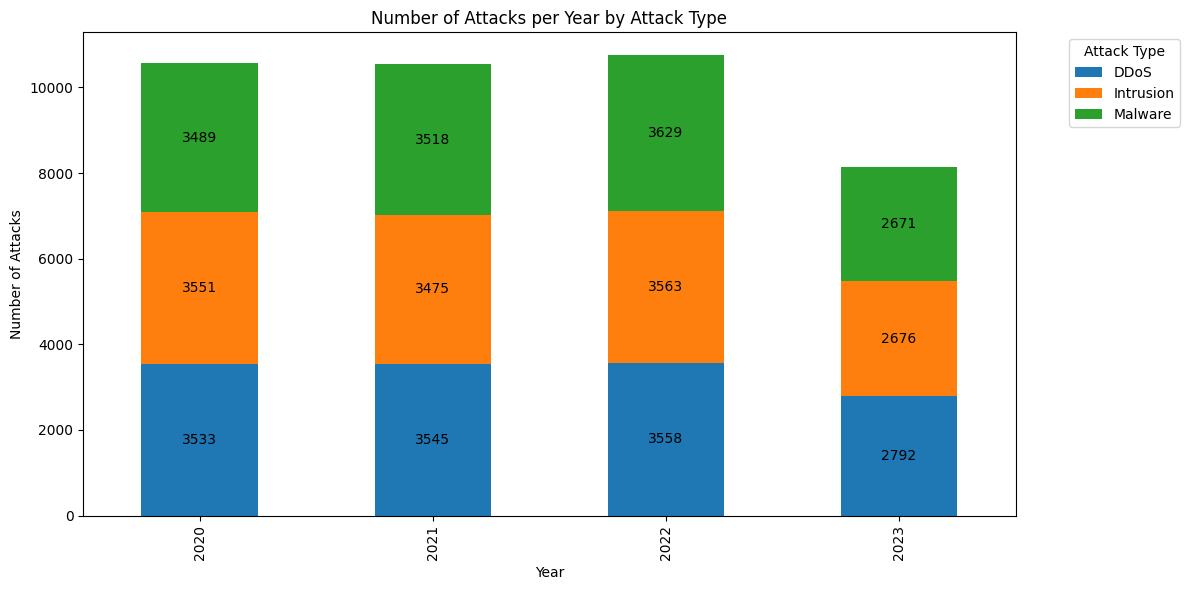

In [11]:
#Number of Attacks per year
df['Year']=df['Timestamp'].dt.year

# Group by YEAR and ATTACK TYPE, count occurrences
attack_counts = df.groupby(['Year', 'Attack Type']).size().unstack(fill_value=0)

# Print a summary of the data
print("Summary of the No.of Attacks Year wise\n",attack_counts)

# Plot the data
ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))

# Customize the plot
plt.title('Number of Attacks per Year by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Add value labels on the bars
for c in ax.containers:
    ax.bar_label(c, label_type='center')

# Show the plot
plt.show()

  Protocol Attack Type  COUNT
0     ICMP        DDoS   4508
6      UDP        DDoS   4482
2     ICMP     Malware   4461
1     ICMP   Intrusion   4460
3      TCP        DDoS   4438
5      TCP     Malware   4437
8      UDP     Malware   4409
7      UDP   Intrusion   4408
4      TCP   Intrusion   4397


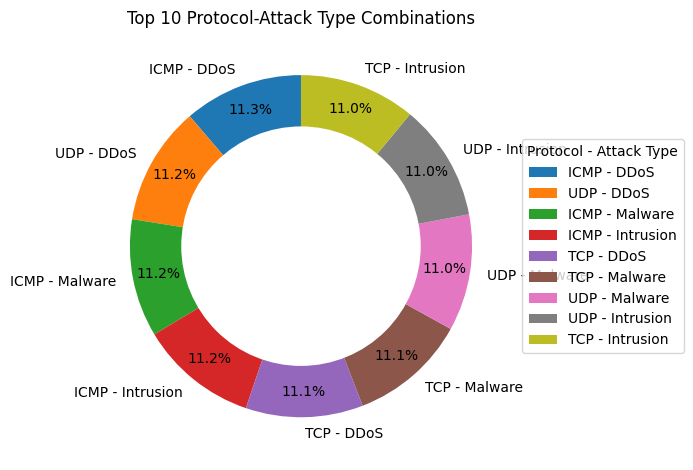

In [15]:
# Count occurrences of each combination of PROTOCOL and ATTACK TYPE
protocol_attack_counts = df.groupby(['Protocol', 'Attack Type']).size().reset_index(name='COUNT')

# Sort by count in descending order and take top 10 for better visibility
top_10 = protocol_attack_counts.sort_values('COUNT', ascending=False).head(10)

# Print a summary of the data
print(top_10)

# Create a pie chart
#ax = attack_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.plot(figsize=(12, 8))
plt.pie(top_10['COUNT'], labels=top_10.apply(lambda x: f"{x['Protocol']} - {x['Attack Type']}", axis=1),
autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Add a circle at the center to create a donut chart (optional)
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add title
plt.title('Top 10 Protocol-Attack Type Combinations')

# Add legend
plt.legend(title='Protocol - Attack Type', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()


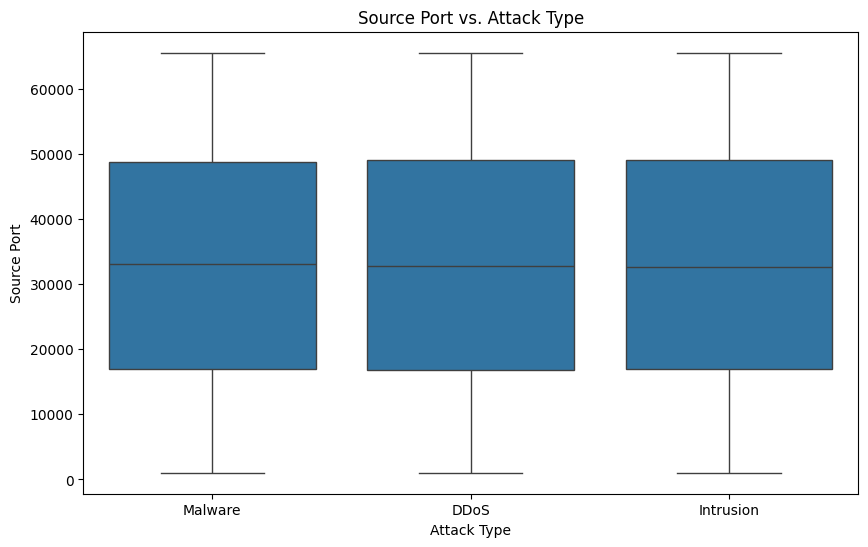

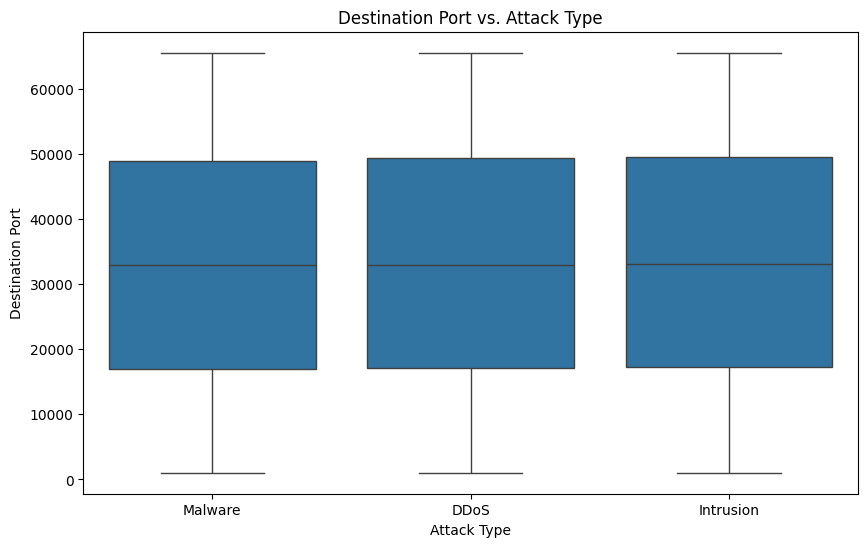

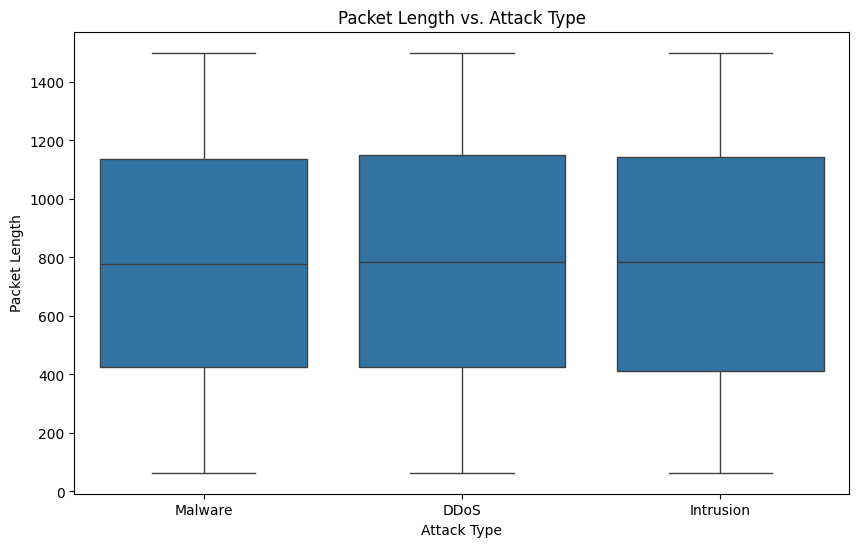

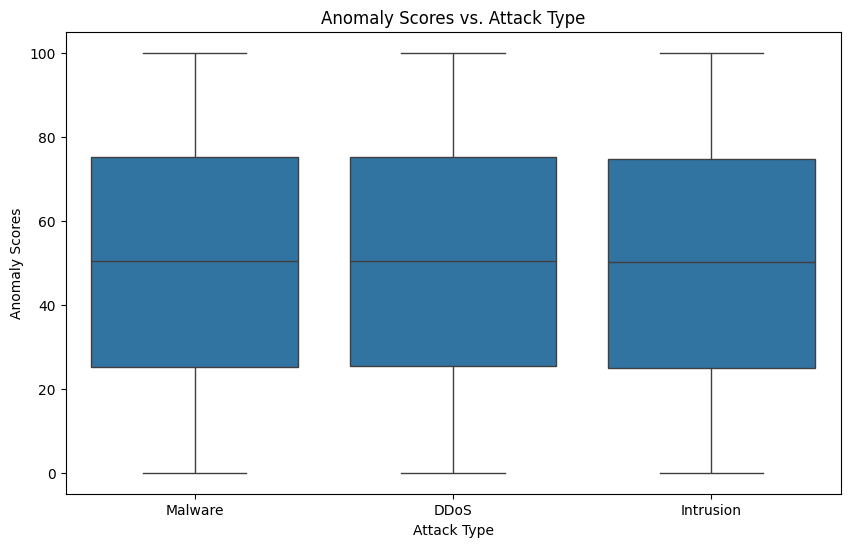

In [17]:
# Explore relationships between features and the target variable
# Select some features for visualization. Adjust based on actual features in your dataset.
features = ['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attack Type', y=feature, data=df)
    plt.title(f'{feature} vs. Attack Type')
    plt.xlabel('Attack Type')
    plt.ylabel(feature)
    plt.show()


## Dataset Preparation for Model Training

### Data Pre-Processing
